df.select_dtypes(include=np.number)# About Dataset
## Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

## Content
price price in US dollars 326--18,823

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
X_train_ = pd.read_csv("dataset_folder/train.csv")
X_sub = pd.read_csv("dataset_folder/test.csv")

In [153]:
X_train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


# Correlation Matrix

In [154]:
X_train_.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


As you can see there a strong correlation between price and carat, x, y, z

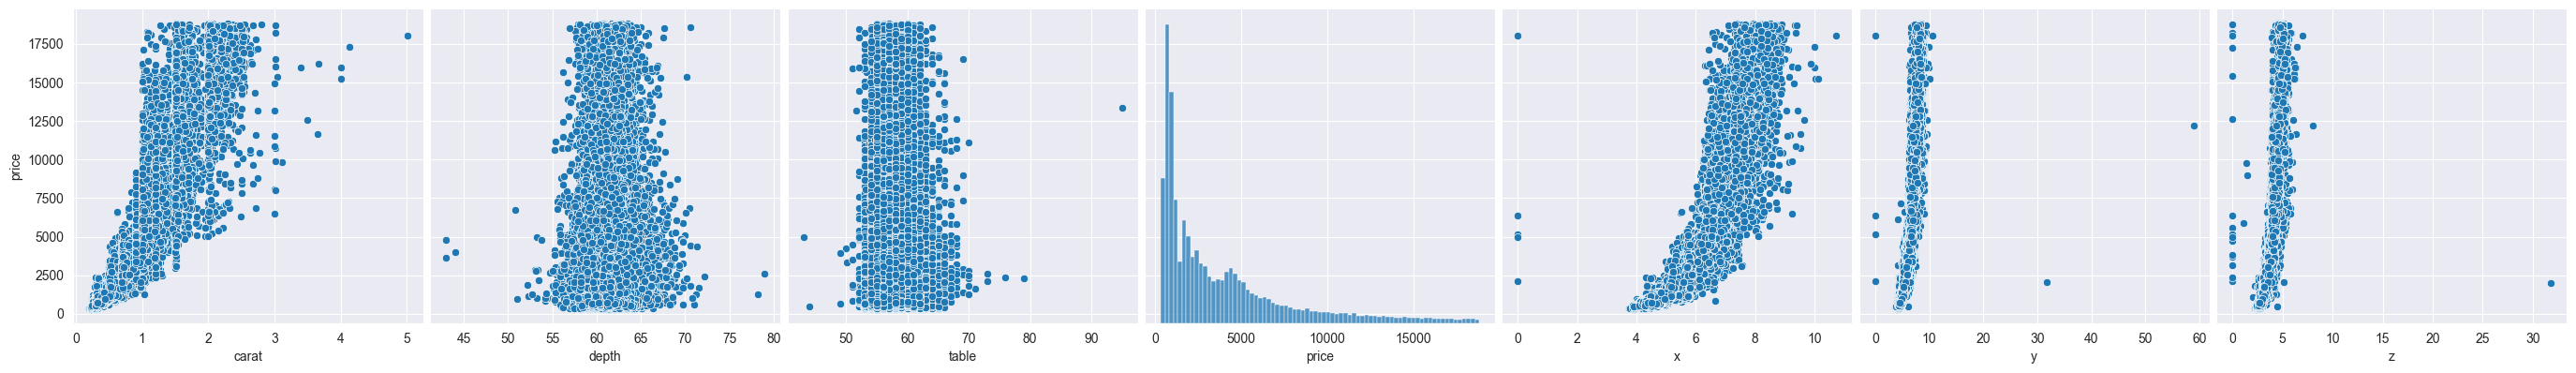

In [155]:
sns.pairplot(data=X_train_, y_vars='price', diag_kind='hist', height=(4))

# Carat Feature

## some outliers
        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),

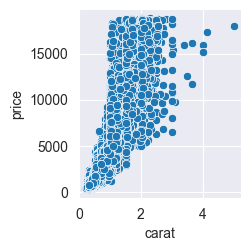

In [70]:
sns.pairplot(data=X_train_, y_vars='price', x_vars='carat')

In [71]:
X_train_[X_train_['carat'] >= 3].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
39490,3.00,Very Good,H,I1,63.1,55.0,6512,9.23,9.10,5.77
23004,3.01,Premium,I,I1,62.7,58.0,8040,9.10,8.97,5.67
22788,3.00,Fair,H,I1,67.1,57.0,8044,8.93,8.84,5.97
20984,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
35076,3.01,Premium,F,I1,62.2,56.0,9925,9.24,9.13,5.73
8689,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
9927,3.00,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33
26229,3.00,Good,E,I1,64.2,65.0,11548,9.08,8.96,5.79
16302,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
12566,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03


If you look at the previous data you will notice some unlogical data (look at the first two rows) 

# Depth Feature

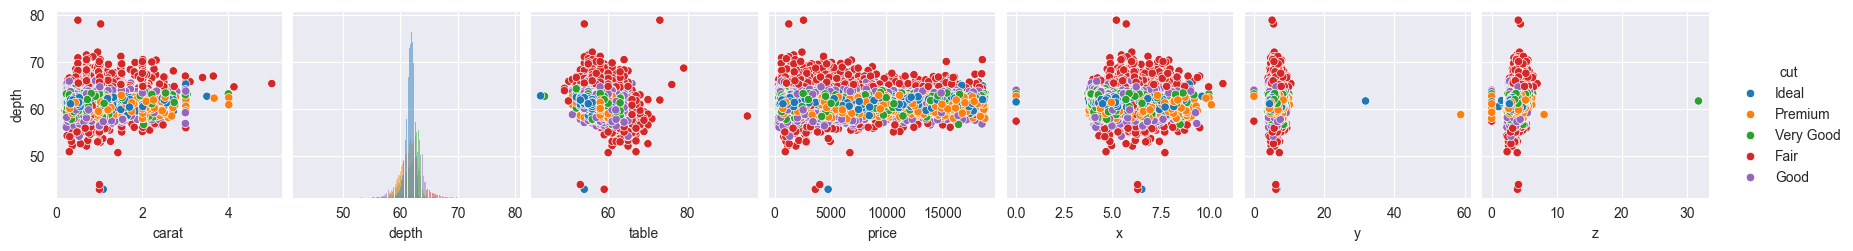

In [72]:
sns.pairplot(data=X_train_, hue='cut', y_vars='depth', diag_kind='hist')

As you can see the depth column don't affect the price and have almost a zero correlation so we can delete this column 

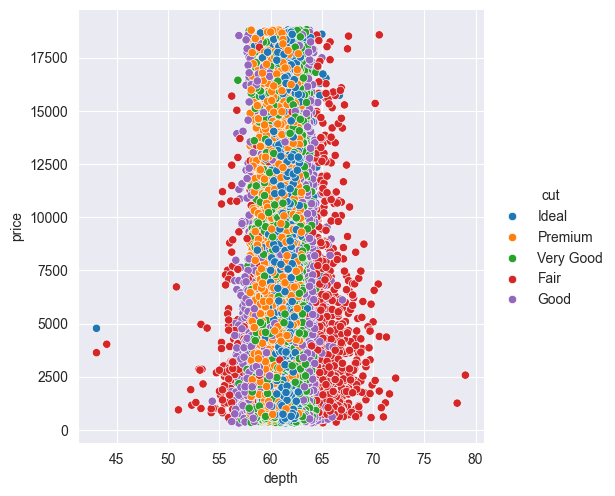

In [77]:
sns.pairplot(data=X_train_, hue='cut', y_vars='price', x_vars='depth', height=5)

In [78]:
X_train_[(X_train_['depth'] >= 75) | (X_train_['depth'] <= 50)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
27567,1.03,Fair,E,I1,78.2,54.0,1262,5.72,5.59,4.42
40895,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
29942,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
39393,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
3476,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12


# Table Feature

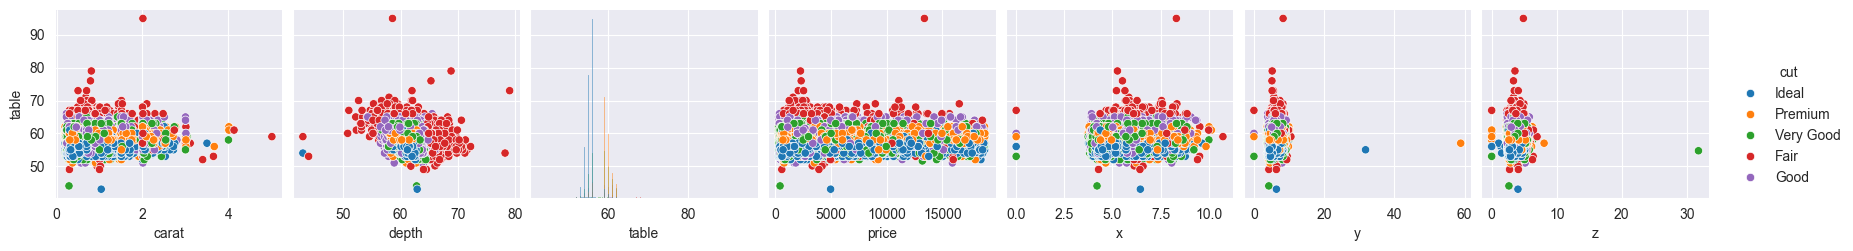

In [73]:
sns.pairplot(data=X_train_, hue='cut', y_vars='table', diag_kind='hist')

the table feature doesn't affect the price and it depends on the cut feature so we can delete it

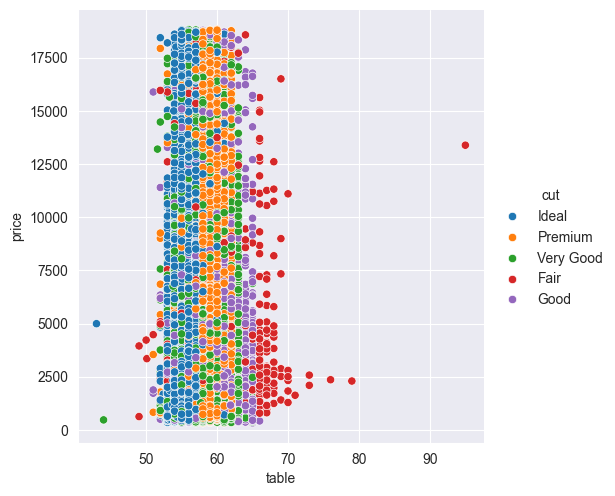

In [79]:
sns.pairplot(data=X_train_, hue='cut', y_vars='price', x_vars='table', height=5)

In [81]:
X_train_[(X_train_['table'] > 70) | (X_train_['table'] < 50)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
26907,0.29,Very Good,E,VS1,62.8,44.0,474,4.20,4.24,2.65
11343,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
5236,0.68,Fair,G,SI1,58.0,71.0,1633,5.85,5.70,3.35
29649,0.70,Fair,H,VS1,62.0,73.0,2100,5.65,5.54,3.47
21722,0.81,Fair,F,SI2,68.8,79.0,2301,5.26,5.20,3.58
15487,0.79,Fair,G,SI1,65.3,76.0,2362,5.52,5.13,3.35
40895,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
42813,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
37011,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
32829,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


# X, Y, Z Features

## X Feature

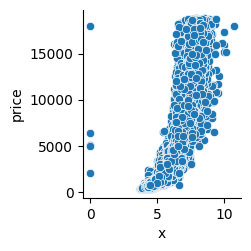

In [13]:
sns.pairplot(data=X_train_, y_vars='price', x_vars='x')

In [14]:
X_train_[X_train_['x'] < 3].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
39201,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
22171,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
1221,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24901,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0


You will have to remove zero x

In [ ]:
feature_name = 'x'
Q1 = X_train_[feature_name].quantile(0.25)
Q2 = X_train_[feature_name].quantile(0.50)
Q3 = X_train_[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train_, y=feature_name)

## Y Feature

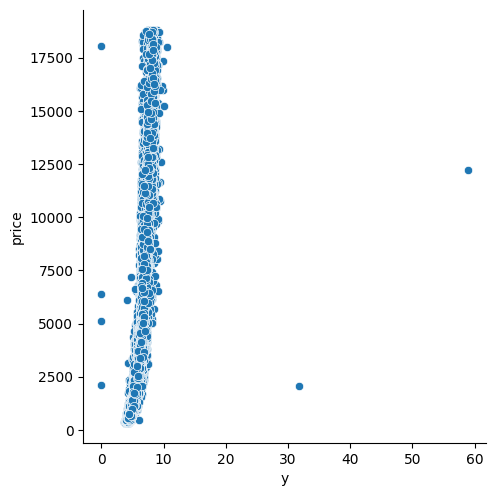

In [15]:
sns.pairplot(data=X_train_, y_vars='price', x_vars='y', height=5)

In [16]:
X_train_[(X_train_['y'] < 0.5) | (X_train_['y'] > 20)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
40663,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.0,0.00
22171,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.0,0.00
1221,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.0,0.00
35359,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
24901,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.0,0.00


Notice the y>20 or y<0.5 they are unlogical in prices

## Z Feature

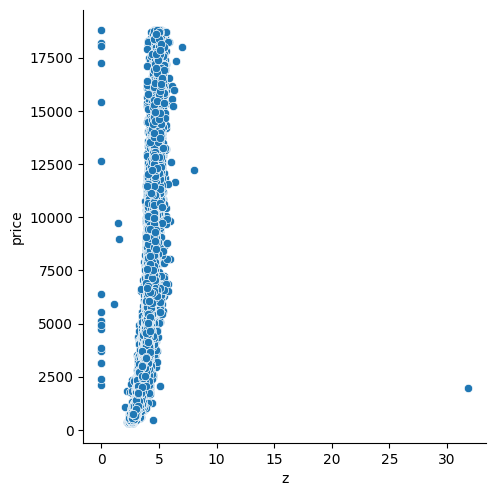

In [18]:
sns.pairplot(data=X_train_, y_vars='price', x_vars='z', height=5)

In [19]:
X_train_[(X_train_['z'] < 1.55) | (X_train_['z'] > 6)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
10541,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
27221,1.12,Premium,G,I1,60.4,59.0,2383,6.71,6.67,0.00
16971,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00
34065,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00
571,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00
14265,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00
4980,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00
39201,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
22171,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00


Q1: 2.91 Q2: 3.53 Q3: 4.04


<Axes: ylabel='z'>

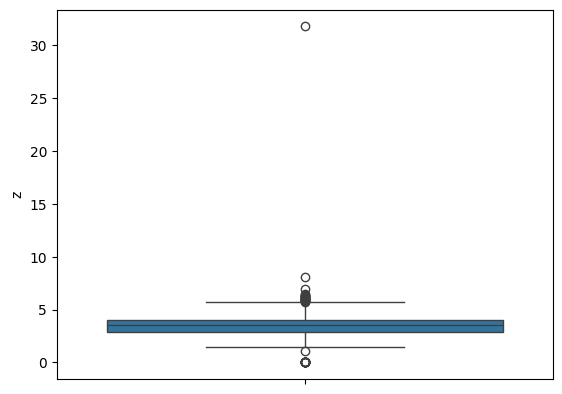

In [20]:
feature_name = 'z'
Q1 = X_train_[feature_name].quantile(0.25)
Q2 = X_train_[feature_name].quantile(0.50)
Q3 = X_train_[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train_, y=feature_name)

In [ ]:
sns.pairplot(data=X_train_, y_vars='price', x_vars='z', height=5)

## Extra Volume Feature

In [44]:
X_train_filtered = X_train_.copy()
X_train_filtered['volume'] = X_train_filtered['x'] * X_train_filtered['y'] * X_train_filtered['z']

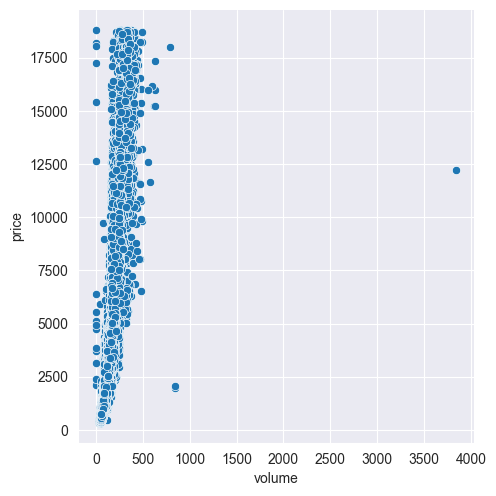

In [45]:
sns.pairplot(data=X_train_filtered, y_vars='price', x_vars='volume', height=5)

In [46]:
X_train_filtered["volume"] = X_train_filtered["volume"].apply(np.log1p)

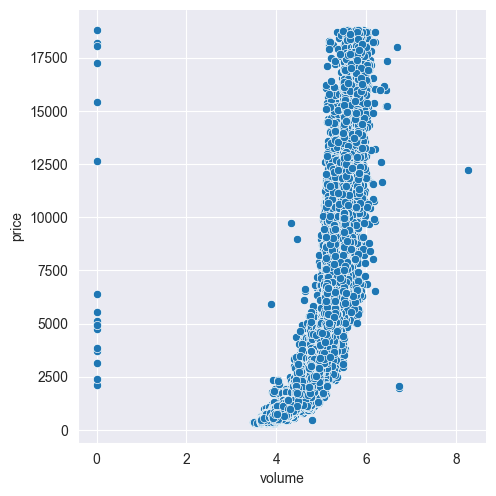

In [47]:
sns.pairplot(data=X_train_filtered, y_vars='price', x_vars='volume', height=5)

In [53]:
X_train_filtered[(X_train_filtered["volume"] < 2)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0,0.0
27221,1.12,Premium,G,I1,60.4,59.0,2383,6.71,6.67,0.0,0.0
16971,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,0.0
34065,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0.0
571,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,0.0
14265,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,0.0
4980,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0.0
39201,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,0.0
22171,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,0.0
21061,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,0.0


As you can see there when volume <2 

## Extra hypo Feature

In [115]:
X_train_filtered = X_train_.copy()
xy_mean = X_train_filtered[['x','y']].mean(axis=1)
base = 0.5*(X_train_filtered['table']/100)*xy_mean
height = X_train_filtered['z']
X_train_filtered['hypo'] = np.sqrt(base**2 + height**2)

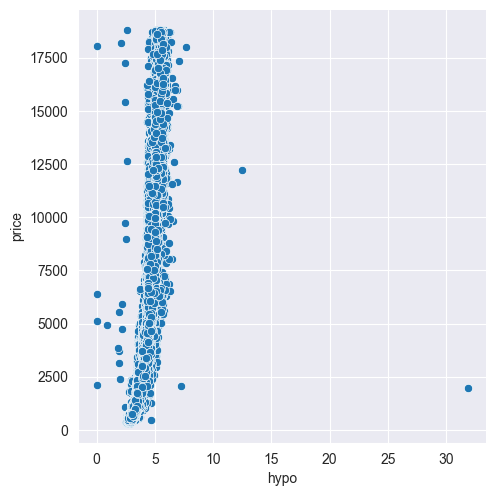

In [116]:
sns.pairplot(data=X_train_filtered, y_vars='price', x_vars='hypo', height=5)


In [117]:
X_train_filtered["hypo"] = X_train_filtered["hypo"].apply(np.log1p)


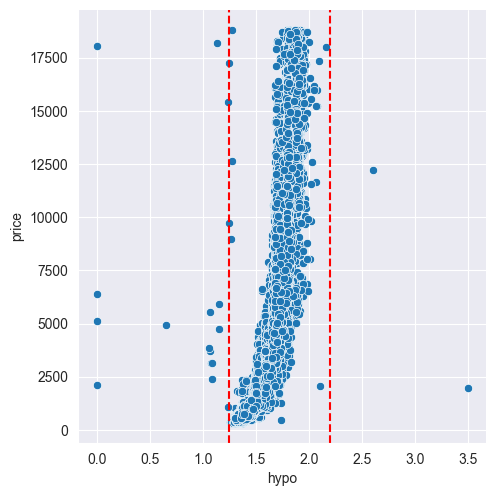

In [129]:
pairplot = sns.pairplot(data=X_train_filtered, y_vars='price', x_vars='hypo', height=5)
for ax in pairplot.axes.flatten():
    ax.axvline(x=1.25, color='r', linestyle='--')
    ax.axvline(x=2.2, color='r', linestyle='--')


In [130]:
X_train_filtered[(X_train_filtered["hypo"] < 1.25) | (X_train_filtered["hypo"] > 2.2)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z,hypo
38259,0.38,Ideal,E,VVS2,60.9,56.0,1068,4.71,4.68,2.06,1.236553
10541,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,3.491373
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00,0.000000
27221,1.12,Premium,G,I1,60.4,59.0,2383,6.71,6.67,0.00,1.089757
16971,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00,1.072243
34065,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00,1.083786
571,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00,1.069209
14265,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00,1.058016
4980,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00,1.151829
39201,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00,0.655861


# Dropping outliers and add volume, hypo features


In [2]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def convert_1(df):   
    x_train_filtered = df.copy()
    imputer = IterativeImputer(missing_values=0)
    x_train_filtered = pd.DataFrame(imputer.fit_transform(x_train_filtered.select_dtypes(include=np.number)), columns=df.select_dtypes(include=np.number).columns)
    x_train_filtered = pd.concat([x_train_filtered, df.select_dtypes(include=np.object_)], axis=1)
    
    x_train_filtered.rename(columns={'x': 'length', 'y': 'width', 'depth': 'depth_percentage', 'z':'depth','table':'table_width'}, inplace=True)
    x_train_filtered.drop("Id", axis=1, inplace=True)
    x_train_filtered['volume'] = x_train_filtered['length'] * x_train_filtered['width'] * x_train_filtered['depth']
    x_train_filtered["volume"] = x_train_filtered["volume"].apply(np.log1p)
    
    xy_mean = x_train_filtered[['length','width']].mean(axis=1)
    base = 0.5*(x_train_filtered['table_width']/100)*xy_mean
    height = x_train_filtered['depth']
    x_train_filtered['hypo'] = np.sqrt(base**2 + height**2)
    
        # Calculate density
    x_train_filtered['density'] = x_train_filtered['carat'] / x_train_filtered['volume']

    # Calculate length-width ratio
    x_train_filtered['length_width_ratio'] = x_train_filtered['length'] / x_train_filtered['width']

    # Calculate volume density
    x_train_filtered['volume_density'] = x_train_filtered['carat'] / (x_train_filtered['length'] * x_train_filtered['width'] * x_train_filtered['depth'])

    # Calculate table area
    x_train_filtered['table_area'] = x_train_filtered['width'] * x_train_filtered['depth']

    # Calculate length-depth ratio
    x_train_filtered['length_depth_ratio'] = x_train_filtered['length'] / x_train_filtered['depth']

    # Calculate width-depth ratio
    x_train_filtered['width_depth_ratio'] = x_train_filtered['width'] / x_train_filtered['depth']
    
    # Calculate carat_depth_prec
    x_train_filtered["carat_depth_prec"] = x_train_filtered["carat"] + x_train_filtered["depth_percentage"]
    
    # Calculate carat_table_width
    x_train_filtered["carat_table_width"] = x_train_filtered["carat"] + x_train_filtered["table_width"]
    
    # Calculate depth_percentage_sum_table_width
    x_train_filtered["depth_percentage_sum_table_width"] = x_train_filtered["depth_percentage"] + x_train_filtered["table_width"]
    
    return x_train_filtered

def convert_2(x_train_filtered):
    x_train_filtered = x_train_filtered[x_train_filtered['length'] >= 3 ]
    x_train_filtered = x_train_filtered[(x_train_filtered['width'] >= 0.5) & (x_train_filtered['width'] <= 20)]
    x_train_filtered = x_train_filtered[(x_train_filtered['depth'] >= 1.55) & (x_train_filtered['depth'] <= 6)]
    x_train_filtered =  x_train_filtered[(x_train_filtered["volume"] > 2)]
    x_train_filtered = x_train_filtered[x_train_filtered['carat'] < 3]
    x_train_filtered = x_train_filtered[(x_train_filtered['depth_percentage'] < 75) | (x_train_filtered['depth_percentage'] > 50)]
    x_train_filtered = x_train_filtered[(x_train_filtered['table_width'] <= 70) | (x_train_filtered['table_width'] >= 50)]
    x_train_filtered = x_train_filtered[(x_train_filtered["hypo"] >= 1.25) | (x_train_filtered["hypo"] <= 2.2)]

    return x_train_filtered

X_train_filtered = convert_1(X_train_)
X_train_filtered = convert_2(X_train_filtered)


In [11]:
X_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43118 entries, 0 to 43151
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   carat                             43118 non-null  float64
 1   depth_percentage                  43118 non-null  float64
 2   table_width                       43118 non-null  float64
 3   price                             43118 non-null  float64
 4   length                            43118 non-null  float64
 5   width                             43118 non-null  float64
 6   depth                             43118 non-null  float64
 7   cut                               43118 non-null  object 
 8   color                             43118 non-null  object 
 9   clarity                           43118 non-null  object 
 10  volume                            43118 non-null  float64
 11  hypo                              43118 non-null  float64
 12  density  

# Pipeline

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline



preprocessing = ColumnTransformer([
        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),
    ],
    # remainder=StandardScaler()
    remainder=MinMaxScaler()
    # remainder='passthrough'
) 

# Model

In [44]:
from sklearn.model_selection import train_test_split
X_train_filtered = convert_1(X_train_)
X_train_filtered = convert_2(X_train_filtered)
X_train, X_test, y_train, y_test = train_test_split(X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'], test_size=0.2, random_state=42)    
df = pd.DataFrame(preprocessing.fit_transform(X_train_filtered.drop(['price'], axis=1)), columns=preprocessing.get_feature_names_out(), index=X_train_filtered.index)

In [45]:
df.columns

Index(['cut_cat__cut', 'color_cat__color', 'clarity_cat__clarity',
       'remainder__carat', 'remainder__depth_percentage',
       'remainder__table_width', 'remainder__length', 'remainder__width',
       'remainder__depth', 'remainder__volume', 'remainder__hypo',
       'remainder__density', 'remainder__length_width_ratio',
       'remainder__volume_density', 'remainder__table_area',
       'remainder__length_depth_ratio', 'remainder__width_depth_ratio',
       'remainder__carat_depth_prec', 'remainder__carat_table_width',
       'remainder__depth_percentage_sum_table_width'],
      dtype='object')

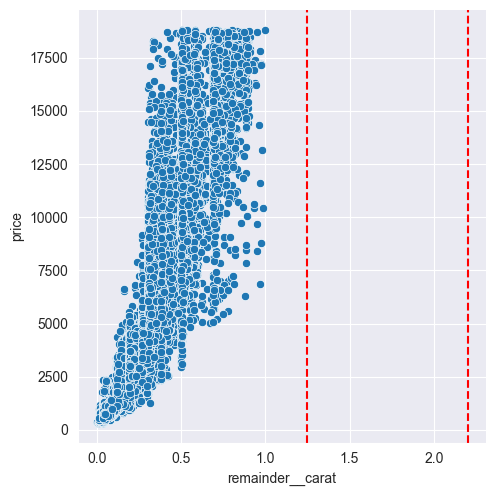

In [43]:
df['price'] = X_train_filtered['price']
pairplot = sns.pairplot(data=df, y_vars='price', x_vars='remainder__carat', height=5)
for ax in pairplot.axes.flatten():
    ax.axvline(x=1.25, color='r', linestyle='--')
    ax.axvline(x=2.2, color='r', linestyle='--')


In [46]:
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

catboost_reg = CatBoostRegressor()
lgbm_reg = LGBMRegressor()
xgb_reg = XGBRegressor()
rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor()

meta_reg = LinearRegression()

stacked_reg = StackingRegressor(
    estimators=[
        ('catboost', catboost_reg),
        ('lgbm', lgbm_reg),
        ('xgb', xgb_reg),
        ('rf', rf_reg),
        ('gb', gb_reg)
    ],
    final_estimator=meta_reg,
    cv=5  
)

clf=make_pipeline(preprocessing, stacked_reg)
# clf_rmses = -cross_val_score(clf, X_train, y_train,
#                                 scoring="neg_root_mean_squared_error", cv=3)
# 
# pd.Series(clf_rmses).describe()

In [191]:
clf.fit(X_train, y_train)

Learning rate set to 0.071639
0:	learn: 3740.9750904	total: 2.88ms	remaining: 2.88s
1:	learn: 3506.1378982	total: 5.48ms	remaining: 2.74s
2:	learn: 3296.7748843	total: 7.52ms	remaining: 2.5s
3:	learn: 3098.3904106	total: 9.78ms	remaining: 2.44s
4:	learn: 2909.0375727	total: 12.1ms	remaining: 2.4s
5:	learn: 2739.9895525	total: 14.3ms	remaining: 2.37s
6:	learn: 2581.9545421	total: 16.5ms	remaining: 2.35s
7:	learn: 2435.7552640	total: 19.1ms	remaining: 2.37s
8:	learn: 2299.2429662	total: 21.7ms	remaining: 2.38s
9:	learn: 2170.9563804	total: 24.1ms	remaining: 2.39s
10:	learn: 2053.5447359	total: 26.7ms	remaining: 2.4s
11:	learn: 1942.1036924	total: 29ms	remaining: 2.38s
12:	learn: 1839.5167183	total: 30.9ms	remaining: 2.34s
13:	learn: 1743.9620150	total: 32.8ms	remaining: 2.31s
14:	learn: 1659.7886874	total: 34.8ms	remaining: 2.28s
15:	learn: 1578.1648521	total: 37ms	remaining: 2.27s
16:	learn: 1503.4676523	total: 39.9ms	remaining: 2.31s
17:	learn: 1434.9416145	total: 42.4ms	remaining: 2.3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('cut_cat',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal']]),
                                                  ['cut']),
                                                 ('color_cat',
                                                  OrdinalEncoder(categories=[['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D']]),
                                                  ['color']),
                                                 ('clarity_cat',
                                                  OrdinalEncoder(categories=[['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VV...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...)),
                                               ('rf', RandomForestRegressor()),
                                               ('gb',
                                                GradientBoostingRegressor())],
                                   final_estimator=LinearRegression()))])

In [7]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = clf.predict(X_train)

print(r2_score(y_train, y_pred), np.sqrt(mean_squared_error(y_train, y_pred)))

0.9928268750595028 337.75162093269705


In [193]:
y_pred = clf.predict(X_test)
print(r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

0.9842686928832044 492.01529067181747


# Train on the overall training data

In [47]:
clf.fit(X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'])

# # Transform the data to select the most important features
# X_selected = clf.transform(X_train)

y_pred = clf.predict(X_train_filtered.drop(['price'], axis=1))

print(r2_score(X_train_filtered['price'], y_pred), np.sqrt(mean_squared_error(X_train_filtered['price'], y_pred)))

Learning rate set to 0.074209
0:	learn: 3717.8079044	total: 3.15ms	remaining: 3.15s
1:	learn: 3476.8816509	total: 5.63ms	remaining: 2.81s
2:	learn: 3256.6853127	total: 8.22ms	remaining: 2.73s
3:	learn: 3054.4646301	total: 10.6ms	remaining: 2.63s
4:	learn: 2861.2585624	total: 12.8ms	remaining: 2.54s
5:	learn: 2683.5099904	total: 15.4ms	remaining: 2.55s
6:	learn: 2520.7103038	total: 17.8ms	remaining: 2.52s
7:	learn: 2373.7636483	total: 20.1ms	remaining: 2.49s
8:	learn: 2234.8607454	total: 22.8ms	remaining: 2.51s
9:	learn: 2105.8461092	total: 25ms	remaining: 2.48s
10:	learn: 1987.8644660	total: 27.1ms	remaining: 2.44s
11:	learn: 1879.1470294	total: 29.3ms	remaining: 2.41s
12:	learn: 1778.0479084	total: 31.3ms	remaining: 2.38s
13:	learn: 1685.6456949	total: 33.5ms	remaining: 2.36s
14:	learn: 1605.0130576	total: 36ms	remaining: 2.37s
15:	learn: 1525.6337582	total: 38.1ms	remaining: 2.34s
16:	learn: 1450.5783789	total: 40ms	remaining: 2.31s
17:	learn: 1382.4773634	total: 42.1ms	remaining: 2.

In [58]:
clf_rmses = -cross_val_score(clf, X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'],
                                scoring="neg_root_mean_squared_error", cv=3)

pd.Series(clf_rmses).describe()

Learning rate set to 0.069604
0:	learn: 3724.4958813	total: 2.09ms	remaining: 2.09s
1:	learn: 3505.3271646	total: 4.01ms	remaining: 2s
2:	learn: 3295.8034605	total: 5.83ms	remaining: 1.94s
3:	learn: 3103.6493780	total: 7.64ms	remaining: 1.9s
4:	learn: 2919.0778584	total: 9.5ms	remaining: 1.89s
5:	learn: 2755.0096987	total: 11.3ms	remaining: 1.87s
6:	learn: 2595.8082670	total: 13.2ms	remaining: 1.87s
7:	learn: 2452.9012522	total: 14.9ms	remaining: 1.85s
8:	learn: 2322.0652738	total: 16.9ms	remaining: 1.86s
9:	learn: 2198.7453267	total: 18.8ms	remaining: 1.86s
10:	learn: 2080.8618231	total: 20.6ms	remaining: 1.85s
11:	learn: 1971.3459428	total: 22.4ms	remaining: 1.84s
12:	learn: 1870.3358984	total: 24.2ms	remaining: 1.84s
13:	learn: 1777.6672737	total: 26ms	remaining: 1.83s
14:	learn: 1691.0213905	total: 27.8ms	remaining: 1.82s
15:	learn: 1608.7217212	total: 29.5ms	remaining: 1.81s
16:	learn: 1533.1712651	total: 31.2ms	remaining: 1.8s
17:	learn: 1461.7687555	total: 33.2ms	remaining: 1.81

count      3.000000
mean     508.426862
std        7.981095
min      502.204124
25%      503.927709
50%      505.651294
75%      511.538231
max      517.425168
dtype: float64

# Submit

In [48]:
pred = clf.predict(convert_1(X_sub))
submit = pd.DataFrame(data={"Id": X_sub["Id"].astype(np.int64), "price": pred})
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      10788 non-null  int64  
 1   price   10788 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 168.7 KB


In [49]:
submit.to_csv("submission.csv", index=False)

# Plot the result

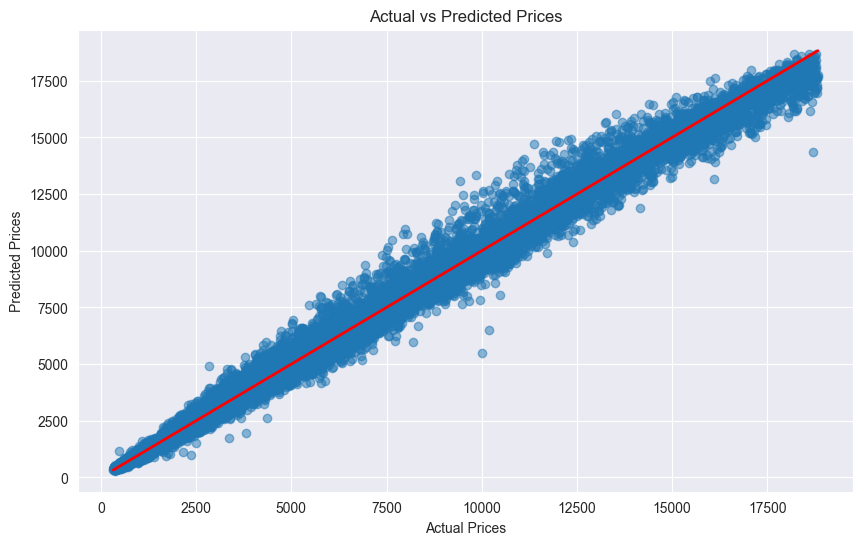

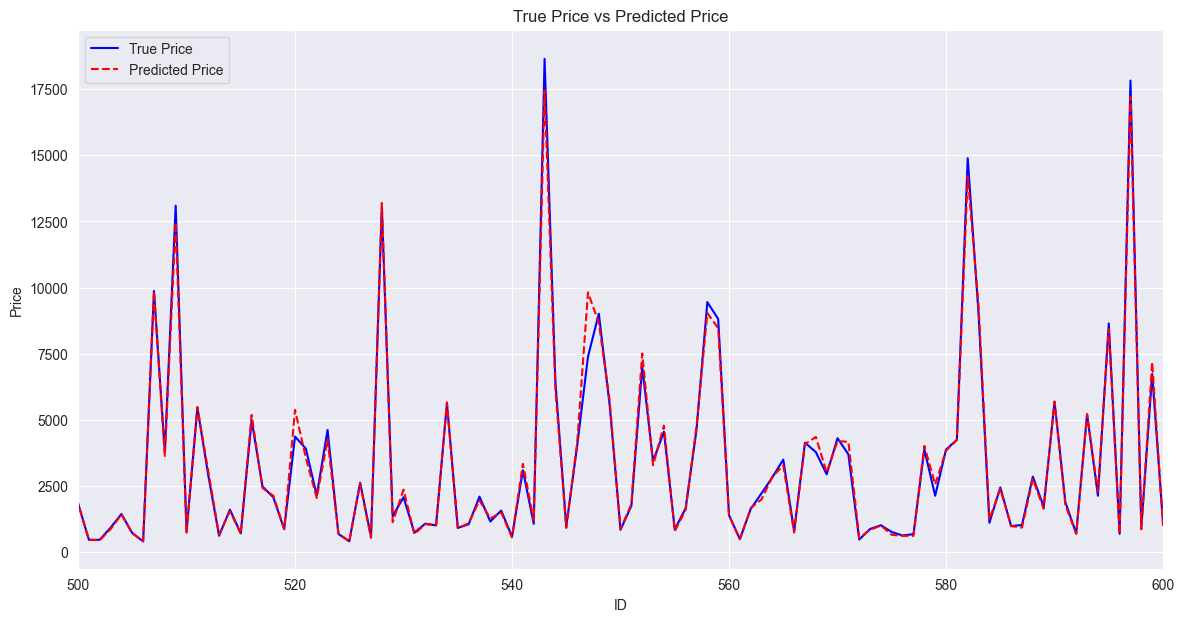

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Actual prices
y_true = X_train_filtered['price']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Extract the IDs
ids = X_train_filtered.index  # Assuming the index is the ID, otherwise use X_train_filtered['Id']

# Create a DataFrame for plotting
results = pd.DataFrame({'Id': ids, 'True Price': y_true, 'Predicted Price': y_pred})

# Sort the results by ID for better visualization
results = results.sort_values(by='Id')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(results['Id'], results['True Price'], label='True Price', color='blue')
plt.plot(results['Id'], results['Predicted Price'], label='Predicted Price', color='red', linestyle='dashed')
plt.xlabel('ID')
plt.ylabel('Price')
plt.title('True Price vs Predicted Price')
plt.legend()
plt.xlim(500, 600)  # Adjust the range as needed
plt.show()